### Practical Project I (Linear Regression)

#### 00-Libraries

In [1]:
##########################################################
# Import Libraries to start work
##########################################################
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

#### 01-Data & Transformation

In [4]:
##########################################################
# Function to read file and select the amount of rows
##########################################################

def load_data_csv(file_name,rows_number=0):
    if rows_number > 0 :
        df = pd.read_csv(file_name, nrows=rows_number)
    else:
        df = pd.read_csv(file_name) 
    return df

In [37]:
#df = load_data_csv(file_name="contratos.csv")
df = pd.read_csv("../database/contratos.csv", delimiter=";")
print(df.shape)

(420, 32)


In [63]:
df.columns

Index(['Objeto do Contrato', 'Tipo de Procedimento', 'Tipo(s) de Contrato',
       'CPV', 'CPV Tipo ', 'CPV Designação', 'CPV Valor',
       'Entidade(s) Adjudicante(s)', 'Entidade(s) Adjudicatária(s)',
       'Preço Contratual', 'Data de Publicação',
       'Data de Celebração do Contrato', 'Prazo de Execução',
       'Local de Execução', 'Fundamentação', 'Causa de Extinção do Contrato',
       'Data de Fecho do Contrato', 'Preço Total Efetivo',
       'Causas das Alterações ao Prazo', 'Causas das Alterações ao Preço',
       'Estado', 'N.º registo do Acordo Quadro', 'Descrição do Acordo Quadro',
       'Procedimento Centralizado', 'Ligação para Peças do Procedimento',
       'Lista de Fornecedores (cocontratantes)',
       'Aquisição ao Abrigo de Acordo Quadro de outro Estado-membro da UE',
       'Medidas especiais', 'Regime', 'Critérios Materiais', 'CCP',
       'groupMembers'],
      dtype='object')

In [40]:
pd.set_option('display.max_rows',None)
#df.isna().any()
df.columns[df.isnull().any()].tolist()


['Causa de Extinção do Contrato',
 'Data de Fecho do Contrato',
 'Preço Total Efetivo',
 'Causas das Alterações ao Prazo',
 'Causas das Alterações ao Preço',
 'Estado',
 'Ligação para Peças do Procedimento',
 'Aquisição ao Abrigo de Acordo Quadro de outro Estado-membro da UE',
 'Medidas especiais',
 'groupMembers']

In [62]:
df.iloc[:, 0:11].head(5)

,Objeto do Contrato,Tipo de Procedimento,Tipo(s) de Contrato,CPV,CPV Tipo,CPV Designação,CPV Valor,Entidade(s) Adjudicante(s),Entidade(s) Adjudicatária(s),Preço Contratual,Data de Publicação
0,AD 38/2023 - Reparação de um sistema de cromat...,Ajuste Direto Regime Geral,Aquisição de serviços,50410000-2,Principal,Serviços de reparação e manutenção de aparelho...,7700.0 €,Universidade da Beira Interior (502083514),"Soquímica, Sociedade de Representações de Quím...","7.700,00 €",13-10-2023
1,Aquisição de serviços de avaliação de funciona...,Ajuste Direto Regime Geral,Aquisição de serviços,71311200-3,Principal,Serviços de consultoria em sistemas de transpo...,19990.0 €,Município da Covilhã (505330768),Universidade da Beira Interior (502083514),"19.990,00 €",13-10-2023
2,AQUISIÇÃO DE SERVIÇO DE CONTRATAÇÃO DE PLATAFO...,Consulta Prévia,Aquisição de serviços,72421000-7,Principal,Serviços de desenvolvimento de aplicações para...,4350.0 €,Município da Covilhã (505330768),"WireMaze, S.A (505331187)","4.350,00 €",12-10-2023
3,Aquisição de serviços de alojamento e refeiçõe...,Consulta Prévia,Aquisição de serviços,55100000-1,Principal,Serviços de hotelaria,25875.0 €,Município da Covilhã (505330768),"Imobiliaria Manuel Brancal, SA Sport Hotel (50...","25.875,00 €",12-10-2023
4,Empreitada para Fornecimento e Instalação de B...,Concurso público,Empreitadas de obras públicas,45315000-8,Principal,Instalação de equipamento para aquecimento e d...,929175.45 €,ENERAREA - Agência Regional de Energia e Ambie...,"Hen, Serviços Energéticos L.da (510287050)","929.175,45 €",12-10-2023


In [47]:
df.iloc[:, 12:23].head(5)

,Prazo de Execução,Local de Execução,Fundamentação,Causa de Extinção do Contrato,Data de Fecho do Contrato,Preço Total Efetivo,Causas das Alterações ao Prazo,Causas das Alterações ao Preço,Estado,N.º registo do Acordo Quadro,Descrição do Acordo Quadro
0,30 dias,"Portugal, Castelo Branco, Covilhã","Artigo 24.º, n.º 1, alínea e), subalínea ii) d...",NaN,NaN,NaN,NaN,NaN,NaN,Não aplicável.,Não aplicável.
1,30 dias,"Portugal, Castelo Branco, Covilhã","Artigo 20.º, n.º 1, alínea d) do Código dos Co...",NaN,NaN,NaN,NaN,NaN,NaN,Não aplicável.,Não aplicável.
2,1096 dias,"Portugal, Castelo Branco, Covilhã","Artigo 20.º, n.º 1, alínea c) do Código dos Co...",NaN,NaN,NaN,NaN,NaN,NaN,Não aplicável.,Não aplicável.
3,366 dias,"Portugal, Castelo Branco, Covilhã","Artigo 20.º, n.º 1, alínea c) do Código dos Co...",NaN,NaN,NaN,NaN,NaN,NaN,Não aplicável.,Não aplicável.
4,366 dias,"Portugal, Castelo Branco, Belmonte<BR/>Portuga...","Artigo 155.º, alínea b) do Código dos Contrato...",NaN,NaN,NaN,NaN,NaN,NaN,Não aplicável.,Não aplicável.


In [48]:
df.iloc[:, 24:32].head(5)

,Ligação para Peças do Procedimento,Lista de Fornecedores (cocontratantes),Aquisição ao Abrigo de Acordo Quadro de outro Estado-membro da UE,Medidas especiais,Regime,Critérios Materiais,CCP,groupMembers
0,https://www.acingov.pt/acingovprod/2/zonaPubli...,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
1,NaN,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
2,https://community.vortal.biz/PRODPublic/Tender...,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
3,NaN,False,NaN,NaN,Código dos Contratos Públicos (DL111-B/2017) e...,False,False,NaN
4,https://www.anogov.com/op-enerarea/faces/app/p...,False,NaN,NaN,Código dos Contratos Públicos ( DL 111-B/2017 ),False,False,NaN


In [60]:
entidades = pd.read_csv("../database/entidades.csv", delimiter=";")
print(entidades.shape)
entidades.head()

(1, 3)


,Descrição,País,NIF
0,"Hen, Serviços Energéticos L.da",Portugal,510287050


In [59]:
pessoa_coletiva = pd.read_excel("../database/coletivo.xlsx")
print(pessoa_coletiva.shape)
pessoa_coletiva.head(5)

(4, 13)


,Estado,Razão social,Forma jurídica,Morada,Website,Código CAE,Atividade (CAE),Número de empregados,Volume de Negócios,Dimensão,Data de constituição,Último balanço disponível,Capital social
0,Ativa,Universidade Da Beira Interior,Inst. Pública,Rua Marquês D' Ávila E Bolama 6201-001 - Covil...,www.ubi.pt,85420,Ensino superior,NaN,NaN,NaN,1986-04-30 00:00:00,Aceder,€
1,NaN,Município Da Covilhã,Autarquia,Pç. Município 6200-151 - Covilhã. Portugal.,www.cm-covilha.pt,84113,Administração Local,501 - 1.000,10.000.000 - 50.000.000 €,Grande,1186/09,2020 Aceder,€
2,Ativa,"Wire Maze - Sistemas De Informação, S.a.",Soc. Anónima,Rua Da Lionesa Nr. 446 Edf. C 5 4465-671 - Leç...,www.wiremaze.com,62010,Atividades de programação informática,21 - 25\n,1 - 2.000.000 €,Pequena,2001-09-17 00:00:00,2021 Aceder,250.001 - 500.000 €
3,Ativa,"Imobiliária Manuel Brancal, S.a.",Soc. Anónima,Rampa Do Jardim Edif. Imb 6200-117 - Covilhã. ...,www.covilhaparquehotel.com.pt,55121,Hotéis sem restaurante,26 - 50,1 - 2.000.000 €,Pequena,1988-11-19 00:00:00,2021 Aceder,500.001 - 5.000.000 €


In [64]:
pormenores = pd.read_excel("../database/pormenores.xlsx")
print(pormenores.shape)
print(pormenores.columns)

(5, 34)
Index(['Data da publicação', 'Tipos de contrato', 'Nº do acordo quadro',
       'Descrição do acordo quadro', 'Tipologia da medida especial',
       'Tipo de procedimento', 'Descrição', 'Fundamentação',
       'Fundamentação para recurso ao ajuste direto (se aplicável)', 'Regime',
       'Critérios materiais', 'Entidades adjudicantes',
       'Entidades adjudicatárias', 'Objeto do contrato',
       'Procedimento centralizado', 'CPVs', 'Data do contrato',
       'Preço contratual', 'Prazo de execução', 'Local de execução',
       'Entidades concorrentes', 'Anúncio', 'Peças do procedimento',
       'Modificações contratuais', 'Documentos', 'Observações',
       'Critérios ambientais',
       'Justificação para não redução a escrito do contrato', 'Aviso',
       'Causa da extinção do contrato', 'Data do fecho do contrato',
       'Preço total efetivo', 'Causas das alterações ao prazo',
       'Causas das alterações ao preço'],
      dtype='object')


In [65]:
pormenores.head(5)

,Data da publicação,Tipos de contrato,Nº do acordo quadro,Descrição do acordo quadro,Tipologia da medida especial,Tipo de procedimento,Descrição,Fundamentação,...,Critérios ambientais,Justificação para não redução a escrito do contrato,Aviso,Causa da extinção do contrato,Data do fecho do contrato,Preço total efetivo,Causas das alterações ao prazo,Causas das alterações ao preço
0,2023-10-12,Empreitadas de obras públicas,Não aplicável.,Não aplicável.,-,Concurso público,Empreitada para Fornecimento e Instalação de B...,"Artigo 155.º, alínea b) do Código dos Contrato...",...,-,-,-,-,-,-,-,-
1,2023-10-11,Aquisição de serviços,Não aplicável.,Não aplicável.,-,Ajuste Direto Regime Geral,Ajuste Direto para a aquisição de serviços par...,"Artigo 20.º, n.º 1, alínea d) do Código dos Co...",...,-,"Artigo 95.º, n.º 1, a), contrato de locação ou...",-,-,-,-,-,-
2,2023-10-10,Aquisição de bens móveis,5839055,CP 2022/13 - Vacinas e tuberculinas,-,Ao abrigo de acordo-quadro (art.º 259.º),641/2023,Artigo 259.º do Código dos Contratos Públicos,...,-,"Artigo 95.º, n.º 1, b), locação ou de aquisiçã...",-,-,-,-,-,-
3,2023-10-10,Aquisição de bens móveis,6214791,Acordo quadro de fornecimento de combustíveis ...,-,Ao abrigo de acordo-quadro (art.º 259.º),Aquisição de gasóleo rodoviário aditivado a gr...,Artigo 259.º do Código dos Contratos Públicos,...,-,-,-,-,-,-,-,-
4,2023-10-06,Aquisição de bens móveis,Não aplicável.,Não aplicável.,-,Ajuste Direto Regime Geral,Aquisição de 800 bolos fintos,"Artigo 20.º, n.º 1, alínea d) do Código dos Co...",...,-,"Artigo 95.º, n.º 1, a), contrato de locação ou...",-,-,-,-,-,-


#### 02- Explore Data Analisis

<AxesSubplot:>

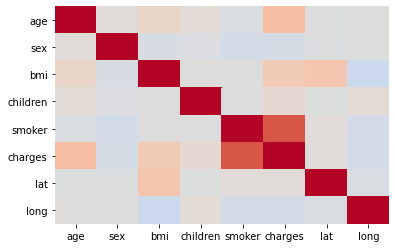

In [74]:
##########################################################
# Data heatmap with each feature
##########################################################
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, vmin=-1, vmax=1)

ValueError: could not convert string to float: 'AD 38/2023 - Reparação de um sistema de cromatografia de gases acoplado a um espectrómetro de massa em tandem - GC/MS/MS '

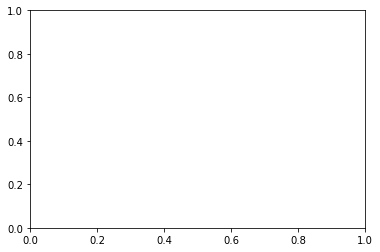

In [34]:
##########################################################
# Function to plot each distribution feature
##########################################################
import warnings
warnings.filterwarnings('ignore')
for column in df.columns:
    plt.figure()
    sns.distplot(df[column], color='red', hist_kws={"edgecolor": 'black'})

#### 03-Build Math Functions Multiple Variable

In [76]:
import math, copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

##### 03.01-Raw data and aplly Functions

In [77]:
##########################################################
# Split Features and Target
##########################################################
X_train = np.array(df[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df["charges"].values)

In [78]:
##########################################################
# Set first values for b & w parameters
##########################################################

b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [79]:
##########################################################
# Linear regression multiple features
##########################################################
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [80]:
##########################################################
# Linear regression multiple features matrix times
##########################################################
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [81]:
##########################################################
# One row test model
##########################################################
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [19.   1.  27.9  0.   1.   1.   1. ]
f_wb shape (), prediction: 1424.3999999999996


In [82]:
##########################################################
# Cost function
##########################################################
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [83]:
##########################################################
# Compute and display cost using start values parameters
##########################################################
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 140824854.83447534


In [84]:
##########################################################
# Gradient function
##########################################################
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [85]:
##########################################################
#Compute and display gradient 
##########################################################
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -11686.78044899777
dj_dw at initial w,b: 
 [-508374.93   -5442.4  -371125.27  -13781.14   -6238.71   -6156.49
   -5264.45]


In [86]:
##########################################################
# Gradient Descent function
##########################################################
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [87]:
##########################################################
# Run model with parameters
##########################################################
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
#paciencia estudar
alpha = 1.0e-6

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape


prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]    

Iteration    0: Cost 160819618.90   
Iteration   50: Cost 138728836.05   
Iteration  100: Cost 121749176.57   
Iteration  150: Cost 108698038.97   
Iteration  200: Cost 98666449.75   
Iteration  250: Cost 90955751.92   
Iteration  300: Cost 85028942.37   
Iteration  350: Cost 80473268.68   
Iteration  400: Cost 76971480.32   
Iteration  450: Cost 74279731.51   
b,w found by gradient descent: 3.65,[158.85   1.63 117.59   4.46   2.68   1.94   1.57] 


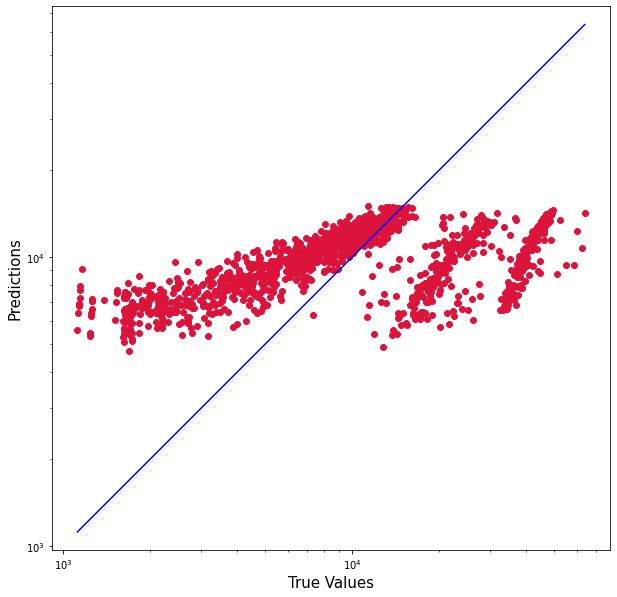

In [88]:
##########################################################
# Plot Results
##########################################################

plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

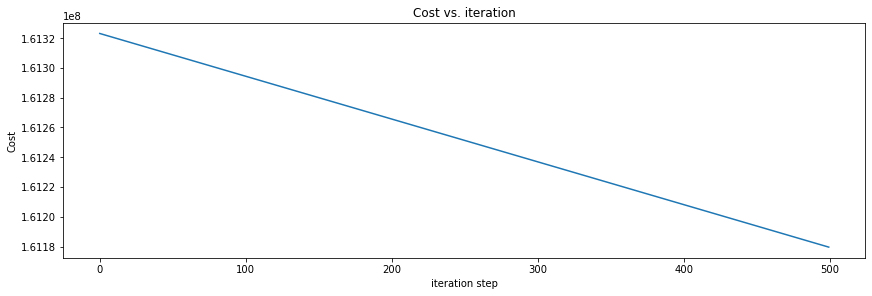

In [118]:
##########################################################
# plot cost versus iteration
##########################################################
# 
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')              
ax1.set_xlabel('iteration step')  
plt.show()

##### 03.02-Normalize data and aplly Functions

In [90]:
##########################################################
# Function to normalize features
##########################################################
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [91]:
df_raw = load_data_csv(file_name="insurance.csv")
df_raw = change_columns(dataframe_input=df_raw)
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


In [92]:
##########################################################
# Apply normalize
##########################################################
df_raw[["age","sex","bmi","children","smoker","lat","long"]], X_mu, X_sigma = zscore_normalize_features(df_raw[["age","sex","bmi","children","smoker","lat","long"]])
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,16884.92400,0.970538,1.028816
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,1725.55230,0.970538,-0.971991
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,4449.46200,0.970538,-0.971991
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,21984.47061,-1.030356,1.028816
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,3866.85520,-1.030356,1.028816
5,-0.584350,1.010519,-0.807656,-0.908614,-0.507463,3756.62160,0.970538,-0.971991
6,0.483668,1.010519,0.455486,-0.078767,-0.507463,8240.58960,0.970538,-0.971991
7,-0.157143,1.010519,-0.479567,1.580926,-0.507463,7281.50560,-1.030356,1.028816
8,-0.157143,-0.989591,-0.136714,0.751079,-0.507463,6406.41070,-1.030356,-0.971991
9,1.480485,1.010519,-0.791252,-0.908614,-0.507463,28923.13692,-1.030356,1.028816


In [93]:
##########################################################
# Split Features and Target
##########################################################
X_train = np.array(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df_raw["charges"].values)

In [94]:
##########################################################
# Set first values for b & w parameters
##########################################################

b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [95]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [-1.44  1.01 -0.45 -0.91  1.97  0.97  1.03]
f_wb shape (), prediction: -14.515332064548502


In [96]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 161066714.43384907


In [97]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -13260.422265141278
dj_dw at initial w,b: 
 [-3613.13   691.33 -2350.88  -821.47 -9529.8   -336.77   857.33]


In [98]:
##########################################################
# Run model with parameters
##########################################################
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 1.0e-6

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]
    

Iteration    0: Cost 161323148.98   
Iteration   50: Cost 161308758.82   
Iteration  100: Cost 161294370.12   
Iteration  150: Cost 161279982.87   
Iteration  200: Cost 161265597.09   
Iteration  250: Cost 161251212.76   
Iteration  300: Cost 161236829.90   
Iteration  350: Cost 161222448.49   
Iteration  400: Cost 161208068.53   
Iteration  450: Cost 161193690.04   
b,w found by gradient descent: 6.63,[ 1.81 -0.35  1.2   0.41  4.76  0.17 -0.43] 


In [99]:
from lab_utils_multi import  load_house_data, run_gradient_descent 

In [100]:
w_norm, b_norm, hist = run_gradient_descent(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values, y_train,500,1.0e-6, )

Iteration Cost          b     
---------------------|--------
        0 1.61323e+08   1.3e-02
       50 1.61309e+08   6.8e-01
      100 1.61294e+08   1.3e+00
      150 1.61280e+08   2.0e+00
      200 1.61266e+08   2.7e+00
      250 1.61251e+08   3.3e+00
      300 1.61237e+08   4.0e+00
      350 1.61222e+08   4.7e+00
      400 1.61208e+08   5.3e+00
      450 1.61194e+08   6.0e+00
w,b found by gradient descent: w: [ 1.81 -0.35  1.2   0.41  4.76  0.17 -0.43], b: 6.63


In [101]:
m,_ = X_train.shape
prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    x_house = np.array(X_train[i])
    x_house_norm = (x_house - X_mu) / X_sigma
    prediction_values[i] = np.dot(x_house_norm, w_norm) + b_norm
    target_values[i] = y_train[i]    

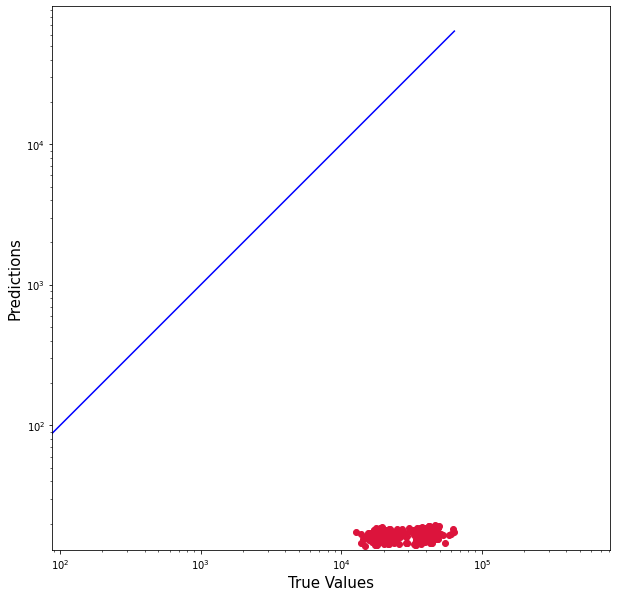

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### 03.03-K Fold Aplication

In [103]:
##########################################################
# Split dataframe in folds
##########################################################                                                             
fold1 = df.loc[0:223]                                            
fold2 = df.loc[224:446]
fold3 = df.loc[447:669]
fold4 = df.loc[670:893]
fold5 = df.loc[894:1117]
fold6 = df.loc[1118:1338]

In [104]:
##########################################################
# merge folds and separate test fold
##########################################################

df_1 = pd.concat([fold1, fold2, fold3, fold4, fold5])
test_val1 = fold6

df_2 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val2 = fold5

df_3 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val3 = fold4

df_4 = pd.concat([fold1, fold2, fold4, fold5, fold6])
test_val4 = fold3

df_5 = pd.concat([fold1, fold3, fold4, fold5, fold6])
test_val5 = fold2

df_6 = pd.concat([fold2, fold3, fold4, fold5, fold6])
test_val6 = fold1

In [105]:
##########################################################
# Function model to run each fold
##########################################################

def run_model(df_fold, test_fold):
    X_train = np.array(df_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_train = np.array(df_fold["charges"].values)
    X_test = np.array(test_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_test = np.array(test_fold["charges"].values)

    # initialize parameters
    initial_w = np.zeros_like(w_init)
    initial_b = 0.
    # some gradient descent settings
    iterations = 500
    alpha = 1.0e-6
    #alpha = 1.0e-2
    # run gradient descent 
    w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient, 
                                                        alpha, iterations)
    print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
    m,_ = X_train.shape
    t,_ = X_test.shape

    prediction_values = np.zeros(t)
    target_values = np.zeros(t)
    
    for i in range(t):
        prediction_values[i] = np.dot(X_test[i], w_final) + b_final
        target_values[i] = y_test[i]
    
    plt.figure(figsize=(5,5))
    plt.scatter(target_values, prediction_values, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(prediction_values), max(target_values))
    p2 = min(min(prediction_values), min(target_values))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    return plt.show()

Iteration    0: Cost 159421132.35   
Iteration   50: Cost 137042877.29   
Iteration  100: Cost 119911923.82   
Iteration  150: Cost 106797832.17   
Iteration  200: Cost 96758688.39   
Iteration  250: Cost 89073447.93   
Iteration  300: Cost 83190144.01   
Iteration  350: Cost 78686240.50   
Iteration  400: Cost 75238281.82   
Iteration  450: Cost 72598659.45   
b,w found by gradient descent: 3.61,[159.54   1.61 116.5    4.33   2.62   1.92   1.48] 


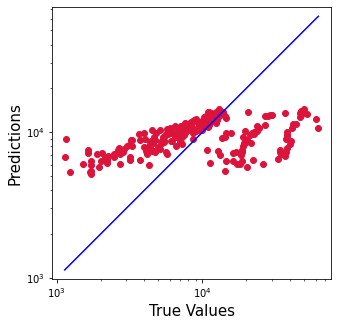

In [106]:
##########################################################
# Run Fold 1
##########################################################
run_model(df_fold=df_1, test_fold=test_val1)

Iteration    0: Cost 162909825.69   
Iteration   50: Cost 140445138.53   
Iteration  100: Cost 123174051.29   
Iteration  150: Cost 109895812.48   
Iteration  200: Cost 99687282.36   
Iteration  250: Cost 91838749.53   
Iteration  300: Cost 85804586.71   
Iteration  350: Cost 81165314.74   
Iteration  400: Cost 77598437.34   
Iteration  450: Cost 74856018.81   
b,w found by gradient descent: 3.70,[160.27   1.57 118.61   4.5    2.69   1.94   1.65] 


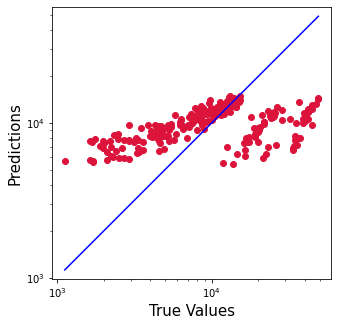

In [107]:
##########################################################
# Run Fold 2
##########################################################
run_model(df_fold=df_2, test_fold=test_val2)

Iteration    0: Cost 162909825.69   
Iteration   50: Cost 140445138.53   
Iteration  100: Cost 123174051.29   
Iteration  150: Cost 109895812.48   
Iteration  200: Cost 99687282.36   
Iteration  250: Cost 91838749.53   
Iteration  300: Cost 85804586.71   
Iteration  350: Cost 81165314.74   
Iteration  400: Cost 77598437.34   
Iteration  450: Cost 74856018.81   
b,w found by gradient descent: 3.70,[160.27   1.57 118.61   4.5    2.69   1.94   1.65] 


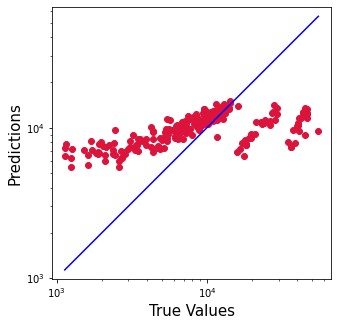

In [108]:
##########################################################
# Run Fold 3
##########################################################
run_model(df_fold=df_3, test_fold=test_val3)

Iteration    0: Cost 161582671.52   
Iteration   50: Cost 139539125.57   
Iteration  100: Cost 122545202.47   
Iteration  150: Cost 109444109.43   
Iteration  200: Cost 99344057.59   
Iteration  250: Cost 91557553.58   
Iteration  300: Cost 85554598.51   
Iteration  350: Cost 80926608.28   
Iteration  400: Cost 77358599.32   
Iteration  450: Cost 74607746.09   
b,w found by gradient descent: 3.69,[159.54   1.58 118.01   4.58   2.75   1.97   1.61] 


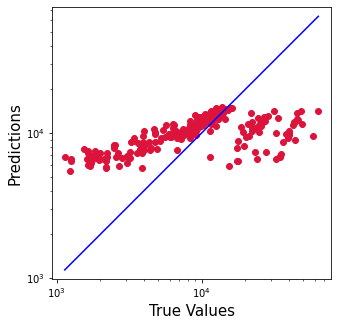

In [109]:
##########################################################
# Run Fold 4
##########################################################
run_model(df_fold=df_4, test_fold=test_val4)

Iteration    0: Cost 157370943.90   
Iteration   50: Cost 136279601.28   
Iteration  100: Cost 120020674.44   
Iteration  150: Cost 107486918.34   
Iteration  200: Cost 97824789.62   
Iteration  250: Cost 90376316.23   
Iteration  300: Cost 84634286.43   
Iteration  350: Cost 80207705.27   
Iteration  400: Cost 76795165.97   
Iteration  450: Cost 74164322.73   
b,w found by gradient descent: 3.62,[155.23   1.65 116.51   4.37   2.65   1.97   1.56] 


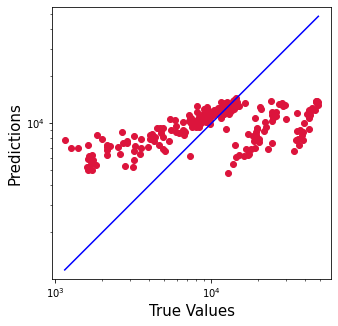

In [110]:
##########################################################
# Run Fold 5
##########################################################
run_model(df_fold=df_5, test_fold=test_val5)

Iteration    0: Cost 162021946.00   
Iteration   50: Cost 139535667.52   
Iteration  100: Cost 122285277.46   
Iteration  150: Cost 109051555.12   
Iteration  200: Cost 98899185.68   
Iteration  250: Cost 91110650.36   
Iteration  300: Cost 85135510.69   
Iteration  350: Cost 80551502.52   
Iteration  400: Cost 77034689.47   
Iteration  450: Cost 74336566.50   
b,w found by gradient descent: 3.66,[159.69   1.66 118.31   4.59   2.66   1.91   1.54] 


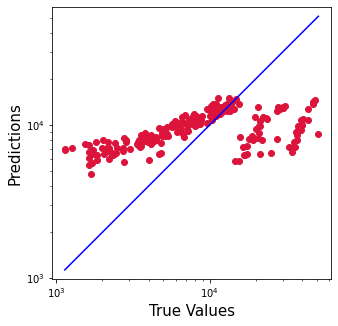

In [111]:
##########################################################
# Run Fold 6
##########################################################
run_model(df_fold=df_6, test_fold=test_val6)

In [112]:
##########################################################
# merge results
##########################################################
results = pd.DataFrame({'kfold': [1], 'gradient_descent': [3.69], 'cost': [74981588.22]})
results = results.append({'kfold': 2, 'gradient_descent': 3.61, 'cost': 72938035.45}, ignore_index=True)
results = results.append({'kfold': 3, 'gradient_descent': 3.61, 'cost': 72938035.45}, ignore_index=True)
results = results.append({'kfold': 4, 'gradient_descent': 3.62, 'cost': 71777591.39}, ignore_index=True)
results = results.append({'kfold': 5, 'gradient_descent': 3.71, 'cost': 77618369.77}, ignore_index=True)
results = results.append({'kfold': 6, 'gradient_descent': 3.72, 'cost': 75715028.39}, ignore_index=True)

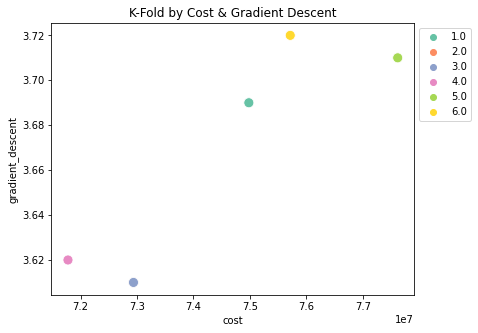

In [113]:
##########################################################
# Plot Folds results
##########################################################
plt.figure(figsize=(6.5,5))
sns.scatterplot(data = results, x = 'cost', y = 'gradient_descent', hue = 'kfold', s=100, palette="Set2").set(title='K-Fold by Cost & Gradient Descent')
plt.legend(markerscale=1, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.show()

In [114]:
##########################################################
# Polinomyal
##########################################################